In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [3]:
data= pd.read_csv('coffee_sales.csv')
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [5]:
data['date']=pd.to_datetime(data['date'])
data['datetime']=pd.to_datetime(data['datetime'])
data['month']=data['date'].dt.strftime('%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 62.1+ KB


# Data Cleaning

1. Handling Missing Values

In [6]:
data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0
month,0


In [7]:
data.groupby('cash_type').count()

,date,datetime,card,money,coffee_name,month
cash_type,,,,,,
card,1044,1044,1044,1044,1044,1044
cash,89,89,0,89,89,89


Here, null values in card column has a meaning. It is not a missing value.

2. Checking Negative Values

In [8]:
(data['money']<0).any()

np.False_

There are no negative values present in the data.

3. Checking for Outliers

<Axes: xlabel='money'>

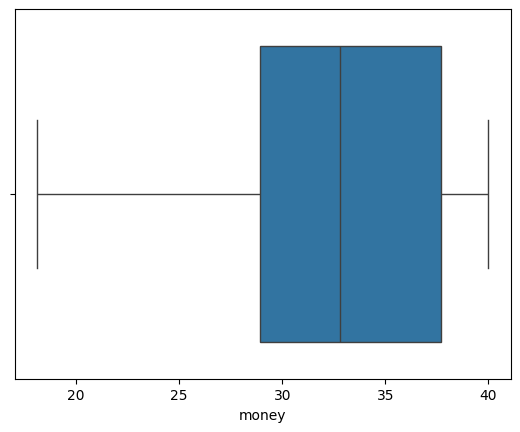

In [9]:
sns.boxplot(x=data['money'])

In [10]:
Q1=data['money'].quantile(0.25)
Q3=data['money'].quantile(0.75)
IQR=Q3-Q1
low=Q1-1.5*IQR
upp=Q3+1.5*IQR
round(low,2),round(upp,2)

(np.float64(15.67), np.float64(50.95))

In [11]:
outliers=data[(data['money']<low) | (data['money']>upp)]
outliers

,date,datetime,cash_type,card,money,coffee_name,month


There are no outliers present in the data.

3.Removing duplicated values

In [12]:
data.duplicated().sum()

np.int64(0)

There are no duplicated values present in the data.

# Key Performance Indicators

In [13]:
Total_sales=data['money'].sum()  #Financial Metric
Total_transaction=data.shape[0]
Avg_transaction=data['money'].mean()
Most_popular_transaction_type=data['cash_type'].mode().iloc[0]
KPI1 = pd.DataFrame({
    'Financial Metric':['Total Sales','Total Transaction','Average Transaction','Most Popular Transaction Type'],
    'Value':[Total_sales,Total_transaction,Avg_transaction,Most_popular_transaction_type]
})
print(KPI1.to_markdown(index=False))

| Financial Metric              | Value              |
|:------------------------------|:-------------------|
| Total Sales                   | 37508.880000000005 |
| Total Transaction             | 1133               |
| Average Transaction           | 33.10580759046779  |
| Most Popular Transaction Type | card               |


In [14]:
Unique_product=data['coffee_name'].unique()  #Product Metric
Top_3=data['coffee_name'].value_counts().nlargest(3).reset_index()
Top_3.columns=['coffee name','purchased no. of times']
Top_3_by_revenue=data.groupby('coffee_name')['money'].sum().nlargest(3).reset_index()
Top_3_by_revenue.columns=['coffee name','Revenue Generated']
print("Unique Products:")
print(Unique_product)
print("Top 3 Products:")
print(Top_3.to_markdown(index=False))
print("Top 3 Products by Revenue:")
print(Top_3_by_revenue.to_markdown(index=False))

Unique Products:
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']
Top 3 Products:
| coffee name         |   purchased no. of times |
|:--------------------|-------------------------:|
| Americano with Milk |                      268 |
| Latte               |                      243 |
| Cappuccino          |                      196 |
Top 3 Products by Revenue:
| coffee name         |   Revenue Generated |
|:--------------------|--------------------:|
| Latte               |             9009.14 |
| Americano with Milk |             8601.94 |
| Cappuccino          |             7333.14 |


# Data Visualization

Customer Preferences

Text(0.5, 1.0, 'cash Vs card payment distribution')

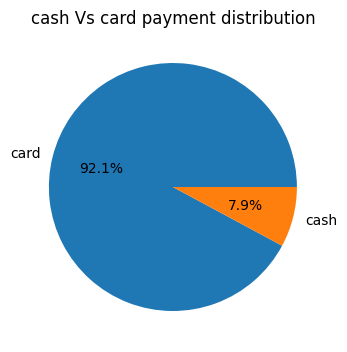

In [15]:
cash_count = data['cash_type'].value_counts()
plt.figure(figsize=(4,6))
plt.pie(cash_count.values,labels=cash_count.index,autopct='%1.1f%%')
plt.title('cash Vs card payment distribution')

Most customer prefers card payment over cash payment.

Text(0.5, 1.0, 'Most Ordered Coffee Types')

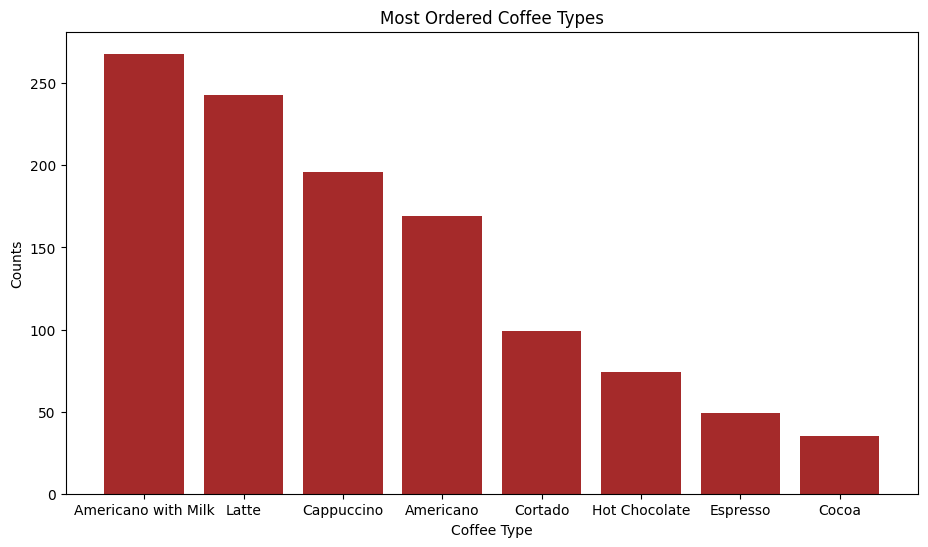

In [16]:
coffee_name_count = data['coffee_name'].value_counts()
plt.figure(figsize=(11,6))
plt.bar(coffee_name_count.index,coffee_name_count.values,color='brown')
plt.xlabel('Coffee Type')
plt.ylabel('Counts')
plt.title('Most Ordered Coffee Types')

Customer most likely prefer Americano with Milk and Latte, while least likely prefer Espresso and Cocoa.

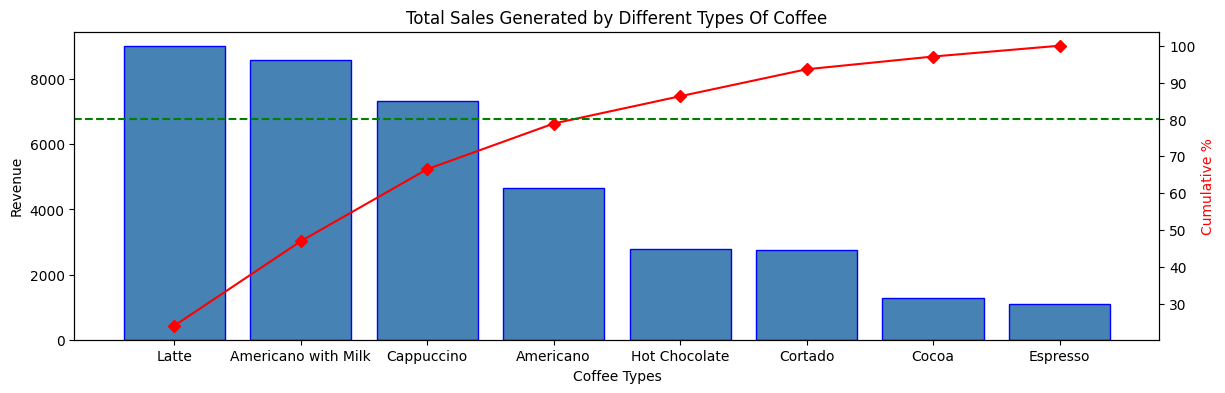

In [17]:
Total_revenue = data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)
Total_revenue['cumulative_revenue']=(Total_revenue['money']/Total_revenue['money'].sum() *100).cumsum()
Total_revenue
fig, ax1=plt.subplots(figsize=(14,4))
plt.bar(Total_revenue['coffee_name'],Total_revenue['money'],color='steelblue',edgecolor='b')
plt.xlabel('Coffee Types')
plt.ylabel('Revenue')
plt.title('Total Sales Generated by Different Types Of Coffee')
ax2 = ax1.twinx()
ax2.plot(Total_revenue['coffee_name'], Total_revenue['cumulative_revenue'], color='red', marker='D', ms=6)
ax2.set_ylabel('Cumulative %', color='red')
ax2.axhline(80, color='green', linestyle='--')

Latte, Americano with Milk and Cappuccino contributes to majority of sales.

Text(0.5, 1.0, 'Total Sales by Weeks')

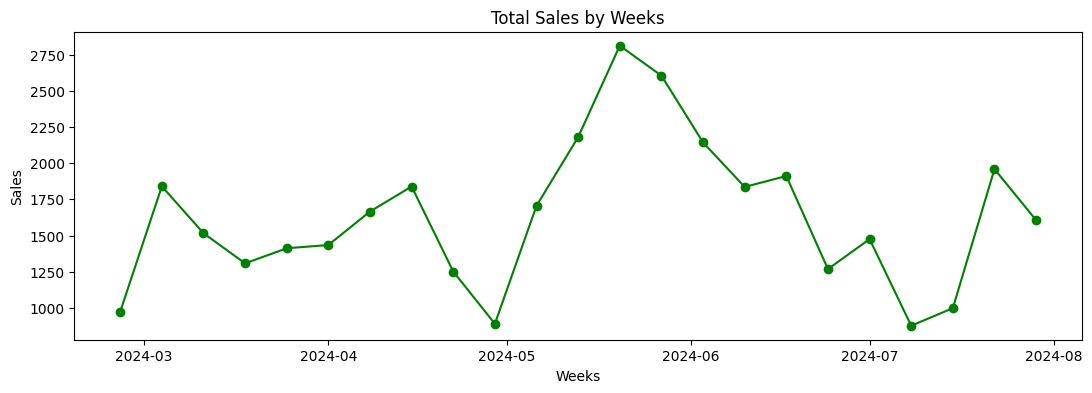

In [18]:
weekly=data.groupby(data['date'].dt.to_period('W')).sum(['money']).reset_index()  #weekly sales
weekly['date']=weekly['date'].dt.to_timestamp()
plt.figure(figsize=(13,4))
plt.plot(weekly['date'],weekly['money'],marker='o',color='g')
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.title('Total Sales by Weeks')

Text(0, 0.5, 'Transaction Count')

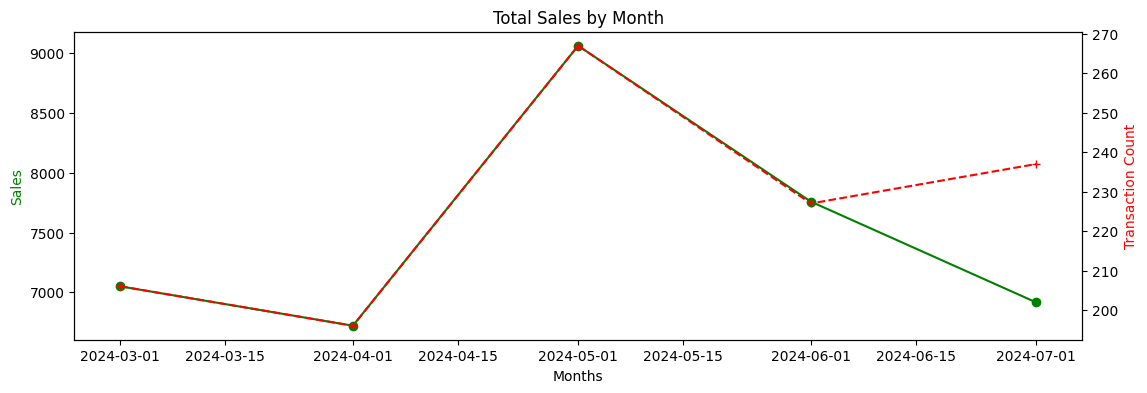

In [26]:
monthly_metrics = data.groupby(data['date'].dt.to_period('M'))['money'].agg(['sum', 'count']).rename(columns={'sum': 'Revenue', 'count': 'Transactions'}).reset_index()
monthly_metrics['date']=monthly_metrics['date'].dt.to_timestamp()
fig,  ay1=plt.subplots(figsize=(13,4))   #monthly sales
plt.plot(monthly_metrics['date'],monthly_metrics['Revenue'],color='g',marker='o')
plt.xlabel('Months')
plt.ylabel('Sales',color='g')
plt.title('Total Sales by Month')
ay2=ay1.twinx()
ay2.plot(monthly_metrics['date'],monthly_metrics['Transactions'],color='r',marker='+',linestyle='dashed')
ay2.set_ylabel('Transaction Count',color='r')

The monthly sales trend shows fluctuation across the observed period with a major peak in May and falling down after that all the way till july.

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03,36,34,20,6,30,10,22,48
1,2024-04,35,42,43,6,19,7,13,31
2,2024-05,48,58,55,9,17,8,14,58
3,2024-06,14,69,46,5,19,10,14,50
4,2024-07,36,65,32,9,14,14,11,56


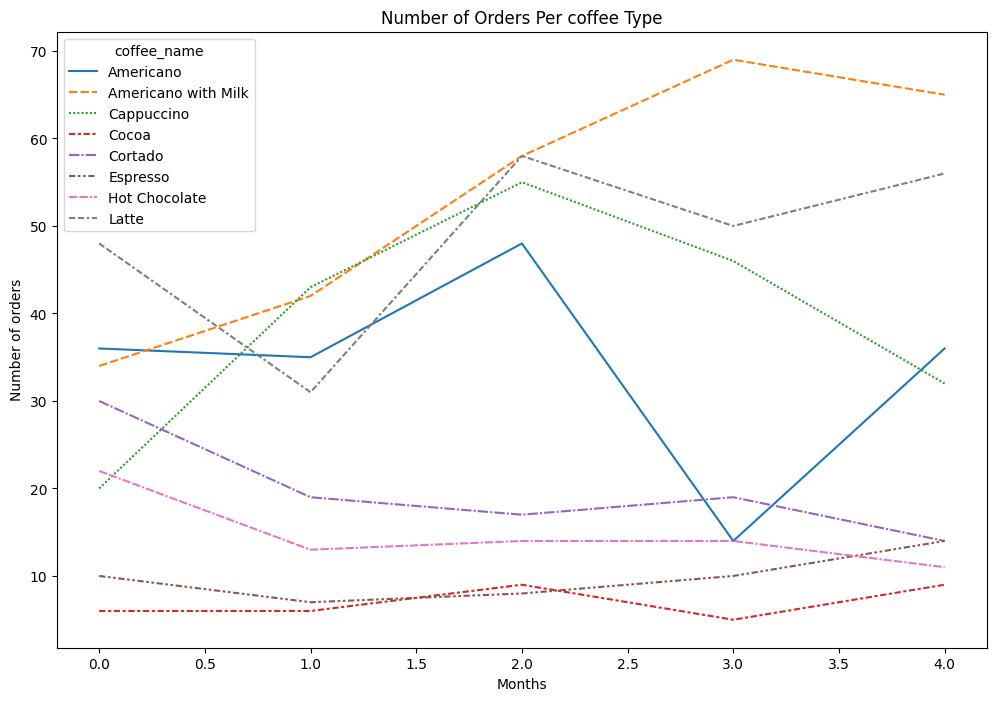

In [20]:
monthly_sales_by_coffee=data.groupby(['coffee_name',data['date'].dt.to_period('M')]).count()['money'].reset_index().rename(columns={'money':'count','date':'month'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(monthly_sales_by_coffee)
plt.xlabel('Months')
plt.ylabel('Number of orders')
plt.title('Number of Orders Per coffee Type')
monthly_sales_by_coffee

Either Americano With Milk or Latte is the most ordered coffee type every month.

# Exploratory Data Analysis

In [21]:
data.describe()

,date,datetime,money
count,1133,1133,1133.000000
mean,2024-05-19 11:36:29.232127232,2024-05-20 02:38:39.053382912,33.105808
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,18.120000
25%,2024-04-14 00:00:00,2024-04-14 10:55:27.406000128,28.900000
50%,2024-05-23 00:00:00,2024-05-23 12:22:06.604999936,32.820000
75%,2024-06-22 00:00:00,2024-06-22 08:39:50.272999936,37.720000
max,2024-07-31 00:00:00,2024-07-31 21:55:16.570000,40.000000
std,NaN,NaN,5.035366


In [22]:
data.loc[:,['cash_type','card','coffee_name']].describe()


,cash_type,card,coffee_name
count,1133,1044,1133
unique,2,446,8
top,card,ANON-0000-0000-0012,Americano with Milk
freq,1044,88,268


Forecasting Sales

In [23]:
model = ARIMA(monthly_metrics['Revenue'], order=(1,1,1))
fit = model.fit()

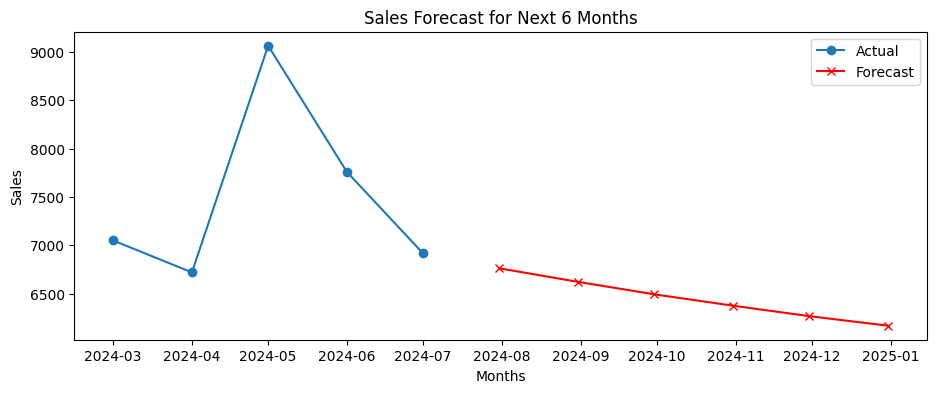

In [24]:
forecast = fit.forecast(steps=6)
forecast_index=pd.date_range(start=monthly_metrics['date'].iloc[-1] + pd.offsets.MonthEnd(1),periods=6,freq='ME')
forecast=pd.Series(forecast.values,index=forecast_index)
plt.figure(figsize=(11,4))
plt.plot(monthly_metrics['date'],monthly_metrics['Revenue'],label='Actual',marker='o')
plt.plot(forecast.index,forecast,label='Forecast',marker='x',color='red')
plt.title('Sales Forecast for Next 6 Months')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()

Sales are forecasted to decline over the next 6 months.